In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

olympic_path = "Summer-Olympic-medals-1976-to-2008.csv"
olympic_file = pd.read_csv(olympic_path, encoding = 'latin-1')
olympic_file

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [2]:
medal_dict = {'Gold':3,'Silver':2,'Bronze':1}
olympic_file['Points'] = olympic_file['Medal'].map(medal_dict)
olympic_file

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Points
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,2.0
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,1.0
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,3.0
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,2.0
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze,1.0
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold,3.0
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver,2.0
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold,3.0


In [3]:
country = olympic_file["Country"].unique()
#country
country_count = olympic_file["Country"].value_counts()
#country_count


In [4]:
len(country)


128

In [5]:
table_df = pd.DataFrame({
    "Year" : olympic_file["Year"],
    "Athlete Name" : olympic_file["Athlete"],
    "Sports" : olympic_file["Sport"],
    "Event" : olympic_file["Event"],
    "Country" : olympic_file["Country"],
    "Gender" : olympic_file["Gender"],
    "Medal" : olympic_file["Medal"]
})
table_df

,Year,Athlete Name,Sports,Event,Country,Gender,Medal
0,1976.0,"KÖHLER, Christa",Aquatics,3m springboard,East Germany,Women,Silver
1,1976.0,"KOSENKOV, Aleksandr",Aquatics,3m springboard,Soviet Union,Men,Bronze
2,1976.0,"BOGGS, Philip George",Aquatics,3m springboard,United States,Men,Gold
3,1976.0,"CAGNOTTO, Giorgio Franco",Aquatics,3m springboard,Italy,Men,Silver
4,1976.0,"WILSON, Deborah Keplar",Aquatics,10m platform,United States,Women,Bronze
...,...,...,...,...,...,...,...
15428,2008.0,"GUENOT, Christophe",Wrestling,66 - 74kg,France,Men,Bronze
15429,2008.0,"KVIRKELIA, Manuchar",Wrestling,66 - 74kg,Georgia,Men,Gold
15430,2008.0,"RAHIMOV, Vitaliy",Wrestling,55 - 60kg,Azerbaijan,Men,Silver
15431,2008.0,"GUENOT, Steeve",Wrestling,60 - 66kg,France,Men,Gold


In [6]:
#total_athlete = olympic_file["Athlete"].nunique()
#print(total_athlete)
gender = olympic_file["Gender"].value_counts()
total = olympic_file["Gender"].count()
gender_percent = gender/total
#total
df_gender = pd.DataFrame({
    "Total Count" : gender,
    "Percentage of Athlete" : gender_percent,})
df_gender["Percentage of Athlete"] = df_gender["Percentage of Athlete"].map(('{:.2%}').format)


df_gender

,Total Count,Percentage of Athlete
Men,9388,61.30%
Women,5928,38.70%


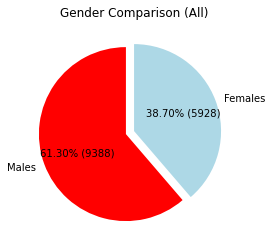

In [35]:
#pie chart for total distruption of males and females, including duplicates
mf_count = olympic_file["Gender"].value_counts()

labels = ["Males" , "Females"]
sizes = mf_count.values
colors = ["red" , "lightblue"]
explode = [0.1 , 0]

def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=make_autopct(sizes),  startangle=90)

plt.title("Gender Comparison (All)")
plt.show()
#print(sizes)
#print(labels)

In [8]:
total = olympic_file["Gender"].count()
total
#labels = total.index

15316

In [9]:
#no dup on athlete name
athlete = olympic_file.drop_duplicates(["Athlete"])
#len(athlete)
dup_gender = pd.DataFrame(athlete)
#dup_gender
gender_1 = dup_gender["Gender"].value_counts()
total_1 = dup_gender["Gender"].count()
gender_percent = gender_1/total_1
#total
gender_df = pd.DataFrame({
    "Total Count" : gender_1,
    "Percentage of Athlete" : gender_percent,})
gender_df["Percentage of Athlete"] = gender_df["Percentage of Athlete"].map(('{:.2%}').format)


gender_df

,Total Count,Percentage of Athlete
Men,7130,62.89%
Women,4207,37.11%


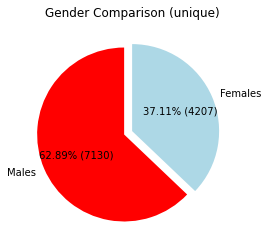

In [36]:
#pie chart for unique athlete
labels = ["Males" , "Females"]
sizes = gender_1
colors = ["red" , "lightblue"]
explode = [0.1 , 0]

def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=make_autopct(sizes),  startangle=90)

plt.title("Gender Comparison (unique)")
plt.show()

In [11]:
#a loop to get all the country and gender into a list
#maybe a function to get all the gender and country 
top_country = olympic_file[["Country" , "Medal"]].groupby("Country").count()
top_country = top_country.sort_values(["Medal"], ascending=False)
top_country

,Medal
Country,
United States,1992
Soviet Union,1021
Australia,798
Germany,691
China,679
...,...
Panama,1
Senegal,1
Sri Lanka,1


In [37]:
#a way to grab all the names and corresponding medal counts
#then group those togethere and make a bar charts for comparison
top_medalist = olympic_file[["Athlete" , "Medal"]].groupby("Athlete").count()
#print(top_medalist)
top_medalist["Gender"] = olympic_file[["Athlete", "Gender"]].groupby("Athlete").first()
#top_medalist["Medal Earned"] = olympic_file[["Athlete", "Medal"]].groupby("Athlete").sum()
top_medalist["Total Points"] = olympic_file[["Athlete", "Points"]].groupby("Athlete").sum()
top_medalist = top_medalist.sort_values(["Medal"], ascending=False)
#need to find a way to reformat the medal earned colums into something more readiable
#maybe like gold(count) , silver(count), bronze(count)
top_medalist.head(10)

,Medal,Gender,Total Points
Athlete,,,
"PHELPS, Michael",16,Men,44.0
"FISCHER, Birgit",12,Women,32.0
"NEMOV, Alexei",12,Men,22.0
"TORRES, Dara",12,Women,24.0
"THOMPSON, Jenny",12,Women,31.0
"ANDRIANOV, Nikolay",12,Men,28.0
"COUGHLIN, Natalie",11,Women,21.0
"BIONDI, Matthew",11,Men,29.0
"DITYATIN, Aleksandr",10,Men,22.0


In [13]:
total = olympic_file["Athlete"].nunique()
print(total)

11337


In [14]:
#month_jan = df[df.MonthName == "Jan"]
#month_jan[feature_cols].sum().sort_values(ascending=0)[:10].plot(kind='bar')

#top_10 = top_medalist[top_medalist == "Athlete"]
#top_10[top_medalist].sum().sort_values(ascending=False)[:10].plot(kind = 'bar')

In [15]:
type(top_medalist)
#top_10 = top_medalist["Athlete"].value_counts()

pandas.core.frame.DataFrame

Text(0, 0.5, 'Total Medal Points')

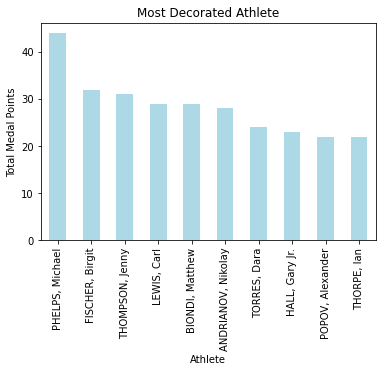

In [16]:
medal_points = top_medalist["Total Points"].sort_values(ascending= False)[:10]
#x_axis = medal_points

#print(medal_points)
medal_points.plot(kind = 'bar', color = 'lightblue')
plt.title("Most Decorated Athlete")
plt.ylabel("Total Medal Points")

In [ ]:
# rough_dict = {}
# for name in olympics_data['Gender']:
#     rough_dict[name] = {'Gold': 0, 'Silver': 0, 'Bronze': 0}
#     olympian = olympics_data[olympics_data['Gender'] == name]
#     for  index, value in olympian.iterrows():
#         if 'gold' in value['Medal'].lower():
#             rough_dict[name]['Gold'] += 1
#             continue
#         elif 'silver' in value['Medal'].lower():
#             rough_dict[name]['Silver'] += 1
#             continue
#         elif 'bronze' in value['Medal'].lower():
#             rough_dict[name]['Bronze'] += 1
#             continue
# athlete_medal = pd.DataFrame.from_dict(rough_dict).T
# athlete_medal.head()